# Stock Market Analysis and Prediction: Leveraging Data Science for Insights

In this notebook, I aim to demonstrate how Data Science and Python can be utilized to perform financial analysis and extract valuable insights from stock data. Focusing on Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN), I will showcase how these tools can analyze stock trends, evaluate performance metrics, and optimize investment strategies. This project highlights the powerful combination of Data Science and finance, providing actionable insights for informed decision-making in the stock market.



### Table of Contents

By following this roadmap, readers can gain a comprehensive understanding of the stock market, learn how to leverage Data Science for financial analysis, and optimize investment strategies for maximum returns. Let's get started!

1. [Introduction](#introduction)  

2. [Data Collection and Preprocessing](#data-collection-and-preprocessing)  
   - [Stock Data Retrieval with APIs](#stock-data-retrieval-with-apis)  
   - [Data Cleaning and Formatting](#data-cleaning-and-formatting)  
   - [Feature Engineering for Machine Learning](#feature-engineering-for-machine-learning)  
     - [Technical Indicators](#technical-indicators)  
     - [Fundamental Metrics](#fundamental-metrics)  
   - [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)  
     - [Cumulative Returns](#cumulative-returns)  
     - [Skewness and Kurtosis](#skewness-and-kurtosis)  
     - [Pairplots and Correlation Matrix](#pairplots-and-correlation-matrix)  

3. [Descriptive Financial Metrics](#descriptive-financial-metrics)  
   - [Performance Metrics](#performance-metrics)  
     - [Beta and Alpha](#beta-and-alpha)  
     - [Sharpe Ratio](#sharpe-ratio)  
   - [Risk Analysis and Volatility](#risk-analysis-and-volatility)  

4. [Machine Learning for Financial Insights](#machine-learning-for-financial-insights)  
   - [Predictive Modeling](#predictive-modeling)  
     - [Stock Price Forecasting](#stock-price-forecasting)  
     - [Volatility Prediction](#volatility-prediction)  
   - [Classification Tasks](#classification-tasks)  
     - [Stock Movement Prediction](#stock-movement-prediction)  
     - [Risk Categorization](#risk-categorization)  
   - [Clustering for Stock Grouping](#clustering-for-stock-grouping)  
   - [Model Evaluation Metrics](#model-evaluation-metrics)  

5. [Portfolio Optimization](#portfolio-optimization)  
   - [What is a Portfolio?](#what-is-a-portfolio)  
   - [Markowitz Mean-Variance Optimization](#markowitz-mean-variance-optimization)  
   - [Black-Litterman Allocation Model](#black-litterman-allocation-model)  
     - [Prior](#prior)  
     - [Views](#views)  
     - [Confidences](#confidences)  
   - [Reinforcement Learning for Portfolio Optimization](#reinforcement-learning-for-portfolio-optimization)  

6. [Backtesting Investment Strategies](#backtesting-investment-strategies)  
   - [Technical Strategy Backtesting](#technical-strategy-backtesting)  
     - [RSI and Moving Average Crossover](#rsi-and-moving-average-crossover)  
     - [Hourly, Daily, and Weekly Data](#hourly-daily-and-weekly-data)  
   - [Comparing ML-Based vs. Traditional Approaches](#comparing-ml-based-vs-traditional-approaches)  

7. [Advanced Machine Learning Applications](#advanced-machine-learning-applications)  
   - [Deep Learning for Sequential Data](#deep-learning-for-sequential-data)  
   - [Anomaly Detection in Stock Behavior](#anomaly-detection-in-stock-behavior)  
   - [Reinforcement Learning for Dynamic Strategies](#reinforcement-learning-for-dynamic-strategies)  

8. [Insights and Conclusions](#insights-and-conclusions)  
   - [Summary of Findings](#summary-of-findings)  
   - [Actionable Insights for Investors](#actionable-insights-for-investors)  
   - [Limitations and Future Work](#limitations-and-future-work)  


## Introduction
____


As a finance data analyst, understanding how to analyze the stock market is a fundamental skill that bridges the gap between raw data and actionable financial insights. The purpose of this notebook is to demonstrate essential skills in financial analysis, leveraging Python and data science techniques to extract meaningful insights from stock market data. By diving into practical examples, this project aims to showcase how data-driven decisions can be applied in the real world to optimize investments and enhance portfolio management.

For this analysis, I have carefully chosen four prominent stocks: **Apple (AAPL)**, **Microsoft (MSFT)**, **Google (Alphabet) (GOOGL)**, and **Amazon (AMZN)**. These companies share key characteristics that make them highly relevant for financial analysis:

1. **Market Leaders**: These stocks belong to some of the largest companies in the world by market capitalization, dominating their respective industries—technology, e-commerce, and cloud computing.
   
2. **Innovation and Growth**: They are known for their consistent innovation and ability to adapt, making them pivotal players in driving technological and economic trends globally.

3. **Broad Investor Interest**: Their stocks are widely traded and held by a diverse range of institutional and retail investors, making them representative of broader market movements.

4. **Global Influence**: These companies operate on a global scale, impacting multiple sectors and economies, which adds complexity and richness to their market behavior.

Through this analysis, I aim to provide a detailed exploration of their historical stock performance, identify key financial metrics, and develop predictive insights. The focus is not just on theoretical concepts but on practical, actionable results that showcase the power of combining finance and data science.


## Data Collection and Preprocessing
____


The success of this project hinges on leveraging powerful Python libraries that enable financial analysis, portfolio optimization, and technical analysis. These libraries form the backbone of the notebook, facilitating data retrieval, manipulation, visualization, and modeling. Below is an overview of the key libraries used and their specific contributions to the project:

### Key Libraries

- **yfinance**:  
  A popular library that provides access to historical stock price data, financial statements, and other key metrics for a wide range of stocks. It is a valuable resource for extracting stock data directly from Yahoo Finance for analysis.

- **Quantstats**:  
  Specializes in quantitative finance, offering tools for analyzing investment strategies, backtesting, and evaluating portfolio performance. It provides a comprehensive suite of functions for detailed financial analysis and visualization of key metrics.

- **PyPortfolioOpt**:  
  Focuses on portfolio optimization, enabling users to construct optimal portfolios based on various criteria such as risk, return, and constraints. It is a powerful tool for optimizing investment strategies, including mean-variance optimization and Black-Litterman models.

- **TA-Lib**:  
  A technical analysis library that offers a wide range of technical indicators for analyzing stock price data. It includes functions for calculating moving averages, RSI, MACD, Bollinger Bands, and other commonly used technical indicators.

- **Pandas**:  
  A core library for data manipulation and analysis, allowing us to handle and preprocess stock data efficiently.

- **Matplotlib and Seaborn**:  
  Essential for data visualization, these libraries are used to create informative plots for understanding trends, correlations, and distributions within the stock data.

- **Plotly**:  
  A powerful interactive visualization library used to create advanced and dynamic visualizations such as candlestick charts, subplots, and 3D plots.

- **Scikit-Learn**:  
  Provides machine learning tools, including linear regression models, which will be used for predictive modeling in this project.

By combining these libraries with Python's robust data science capabilities, we can unlock the full potential of financial analysis and stock market prediction.

---

In [9]:
# Importing Libraries

# Data handling and statistical analysis
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data
import quantstats as qs
import ta
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

import skimpy as sp

## Getting Started
____

The first step in our analysis is to retrieve historical stock price data for Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN) using the `yfinance` library. This data will serve as the foundation for our analysis, enabling us to calculate key financial metrics, visualize stock trends, and derive actionable insights.


### Stock Data Collection


- Apple: aapl

- Microsoft: msft

- Google (Alphabet): googl

- Amazon: amzn


In [13]:
# Getting daily returns for 4 different US stocks in the same time window for a period of 10 years
start = '2010-07-01'
end = '2023-02-10'

# Getting returns for each stock
aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2010-07-01':'2023-02-10']

msft = qs.utils.download_returns('MSFT')
msft = msft.loc['2010-07-01':'2023-02-10']

googl = qs.utils.download_returns('GOOGL')  # or you can use 'GOOG'
googl = googl.loc['2010-07-01':'2023-02-10']

amzn = qs.utils.download_returns('AMZN')
amzn = amzn.loc['2010-07-01':'2023-02-10']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Converting timezone to None to avoid errors
aapl.index = aapl.index.tz_convert(None)
msft.index = msft.index.tz_convert(None)
googl.index = googl.index.tz_convert(None)
amzn.index = amzn.index.tz_convert(None)

In [11]:
# visualizing the data with the help of the Skimpy library
for i in [aapl, msft, googl, amzn]:
    sp.skim(i)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3176   │ │ float64     │ 1     │                                                          │
│ │ Number of columns │ 1      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA ┃ NA % ┃ mean     ┃ sd      ┃ p0      ┃ p25       ┃ p50      ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ AAPL         │  0 │    0 │ 0.001051 │ 0.01801 │ -0.1286 │ -0.007586 │ 0.000833 │ 0.01048 │ 0.1198 │    ▅▇  │  │
│ └──────────────┴────┴──────┴──────────┴─────────┴─────────┴───────────┴──────────┴─────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3176   │ │ float64     │ 1     │                                                          │
│ │ Number of columns │ 1      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃    ┃      ┃           ┃         ┃         ┃           ┃           ┃          ┃        ┃        ┃  │
│ ┃ me        ┃ NA ┃ NA % ┃ mean      ┃ sd      ┃ p0      ┃ p25       ┃ p50       ┃ p75      ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ MSFT      │  0 │    0 │ 0.0009034 │ 0.01649 │ -0.1474 │ -0.007127 │ 0.0005893 │ 0.009208 │ 0.1422 │    ▅▇  │  │
│ └───────────┴────┴──────┴───────────┴─────────┴─────────┴───────────┴───────────┴──────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3176   │ │ float64     │ 1     │                                                          │
│ │ Number of columns │ 1      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃    ┃      ┃           ┃         ┃         ┃           ┃           ┃          ┃        ┃        ┃  │
│ ┃ me        ┃ NA ┃ NA % ┃ mean      ┃ sd      ┃ p0      ┃ p25       ┃ p50       ┃ p75      ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ GOOGL     │  0 │    0 │ 0.0008205 │ 0.01717 │ -0.1163 │ -0.007103 │ 0.0007937 │ 0.009188 │ 0.1626 │   ▁▇   │  │
│ └───────────┴────┴──────┴───────────┴─────────┴─────────┴───────────┴───────────┴──────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3176   │ │ float64     │ 1     │                                                          │
│ │ Number of columns │ 1      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA  ┃ NA % ┃ mean     ┃ sd      ┃ p0      ┃ p25       ┃ p50      ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ AMZN         │   0 │    0 │ 0.001125 │ 0.02085 │ -0.1405 │ -0.008929 │ 0.001043 │ 0.0117 │ 0.1575 │    ▇▃  │  │
│ └──────────────┴─────┴──────┴──────────┴─────────┴─────────┴───────────┴──────────┴────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Daily Returns

The daily returns of a stock are a crucial metric for understanding its performance over time. By calculating the daily returns, we can analyze the volatility, trends, and overall behavior of the stock. Let's calculate the daily returns for each of the four stocks and visualize them using a line plot.

Apple Daily Returns Plot:


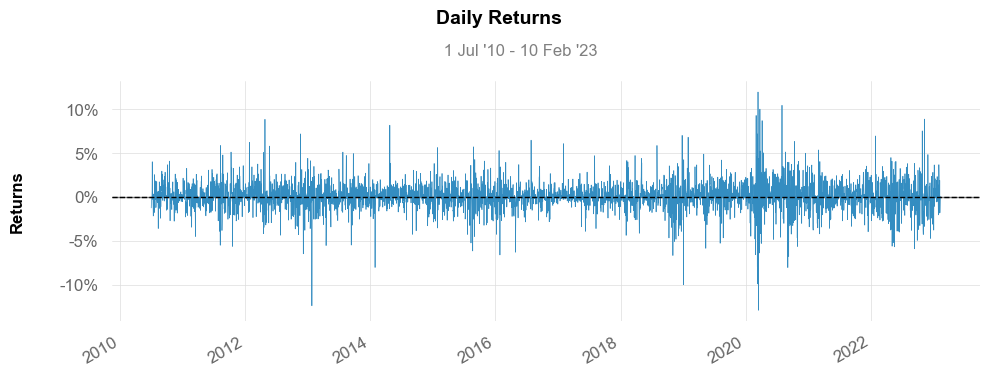



Microsoft Daily Returns Plot:


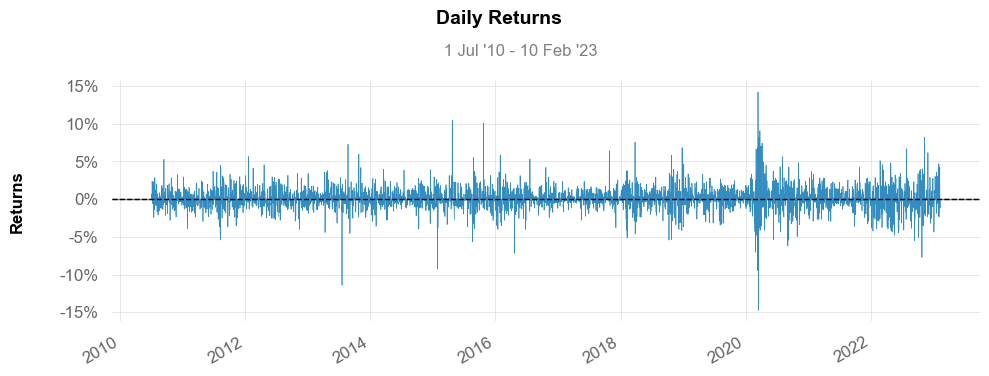



Google Daily Returns Plot:


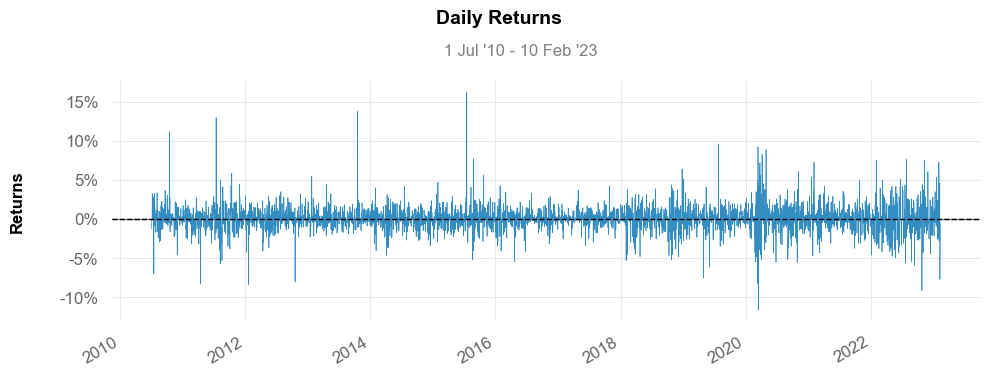



Amazon Daily Returns Plot:


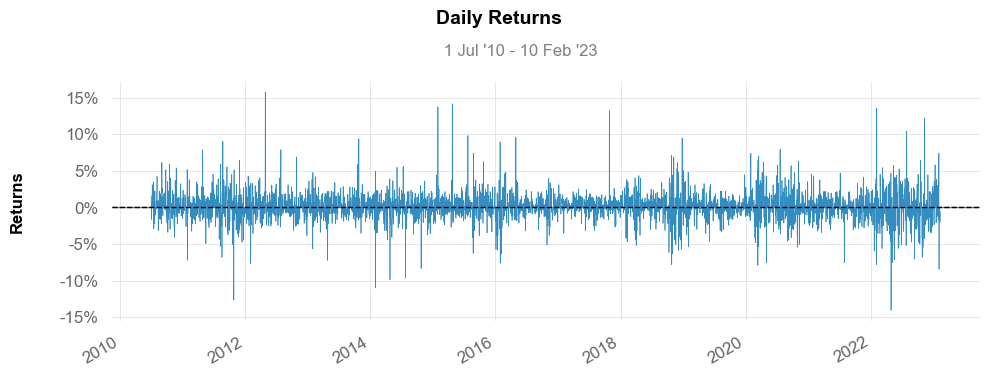

In [14]:
# plotting daily return for each stocks

print('Apple Daily Returns Plot:')
qs.plots.daily_returns(aapl, benchmark='SPY')
print('\n')

print('Microsoft Daily Returns Plot:')
qs.plots.daily_returns(msft, benchmark='SPY')
print('\n')

print('Google Daily Returns Plot:')
qs.plots.daily_returns(googl, benchmark='SPY')
print('\n')

print('Amazon Daily Returns Plot:')
qs.plots.daily_returns(amzn, benchmark='SPY')
print('\n')

The plot above shows the daily returns of Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN) over the specified time period. The daily returns provide valuable insights into the volatility and performance of each stock, highlighting periods of growth, decline, and stability. By analyzing these trends, we can gain a deeper understanding of the stock's behavior and make informed investment decisions. Specifically, the year 2020 stands out as a period of significant volatility and fluctuation in stock prices, reflecting the broader economic impact of the COVID-19 pandemic.

### Cumulative Returns 


The cumulative returns of a stock represent the total return on investment over a specified time period. By calculating the cumulative returns, we can assess the overall performance of the stock and compare it to other investments. Let's calculate the cumulative returns for Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN) and visualize them using a line plot.


Apple Cumulative Returns Plot



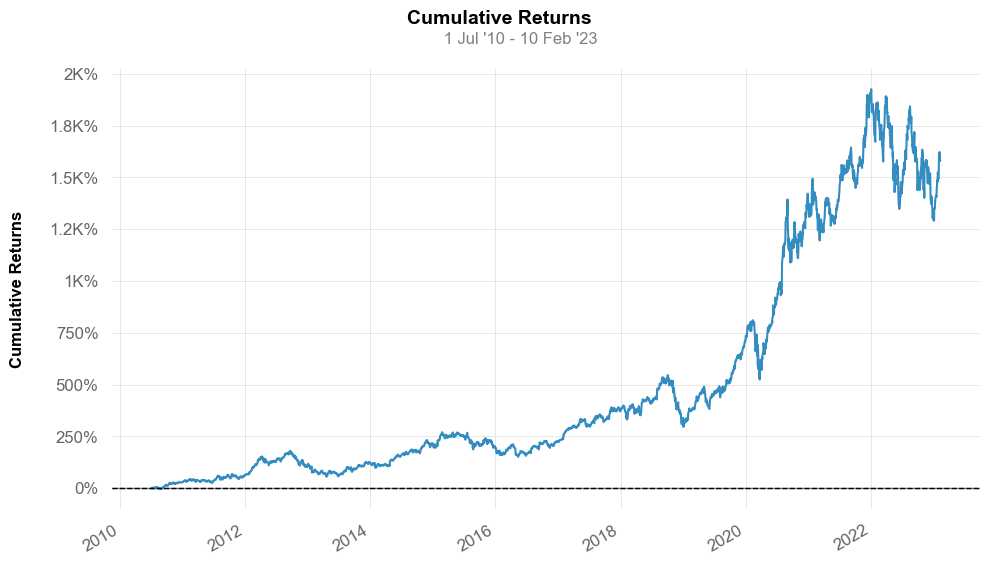


Apple Cumulative Returns Plot



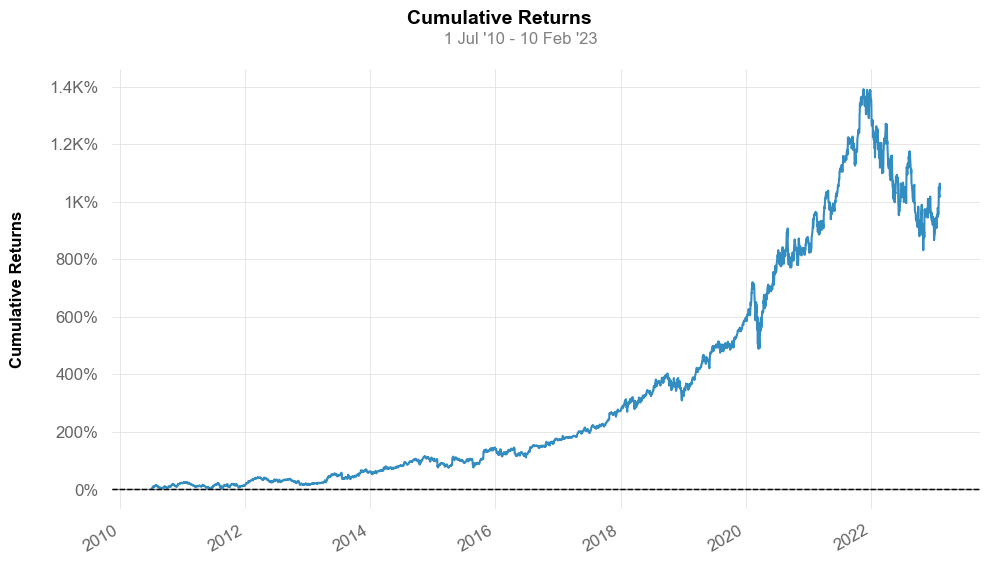


 Mic Cumulative Returns Plot



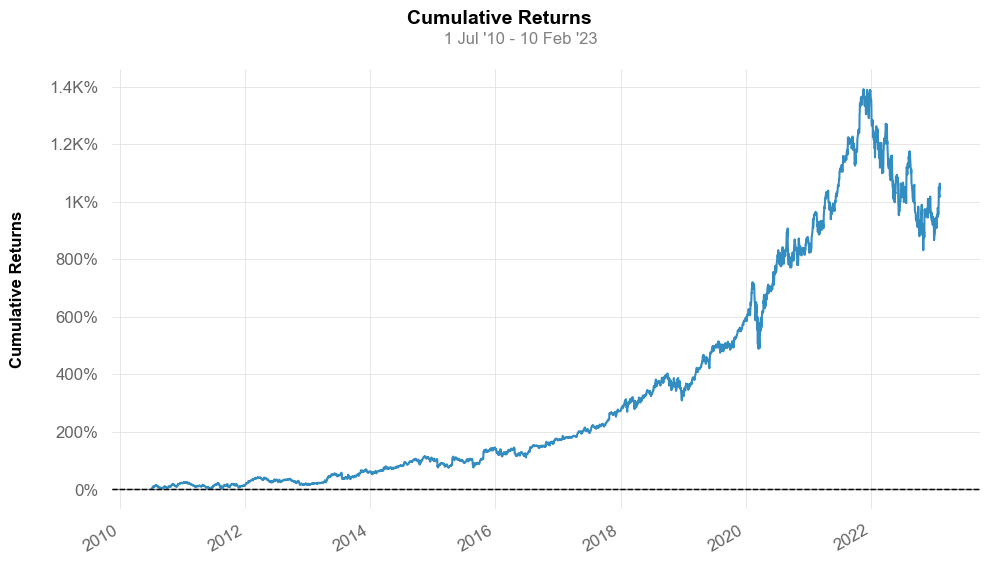


 Amazon Cumulative Returns Plot



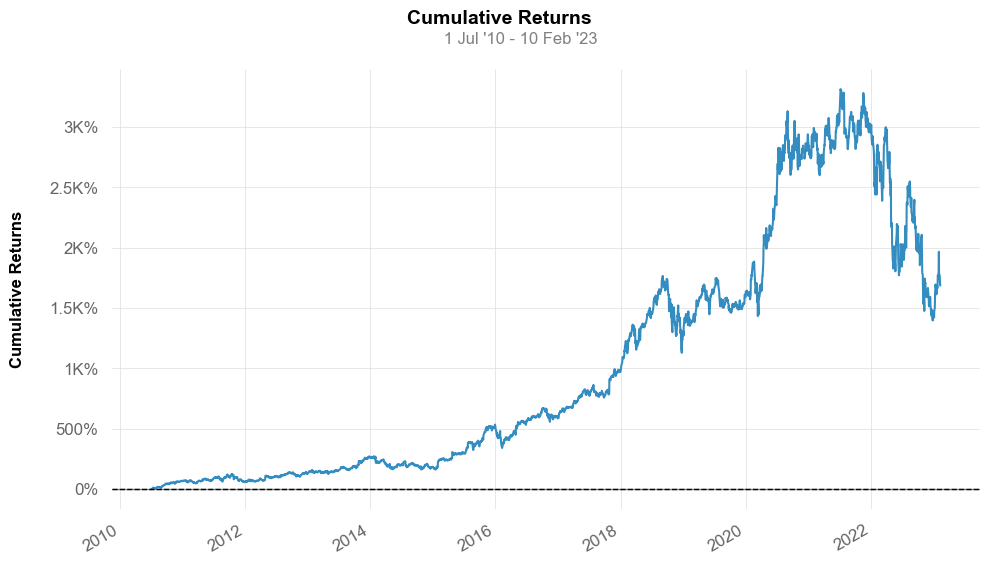

In [7]:
#apple cumulative returns
print('\nApple Cumulative Returns Plot\n')
qs.plots.returns(aapl)


#microsoft cumulative returns
print('\nApple Cumulative Returns Plot\n')
qs.plots.returns(msft)

#google cumulative returns
print('\n Mic Cumulative Returns Plot\n')
qs.plots.returns(msft)

#google cumulative returns
print('\n Amazon Cumulative Returns Plot\n')
qs.plots.returns(amzn)

The cumulative return chart above illustrates the performance of Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN) over a specified time period. It captures the total return on investment for each stock, starting from the initial date to the present, reflecting both price changes and the compounding effect of reinvested gains. This visualization provides a comprehensive and aggregated view of how each stock has performed over time.   


By analyzing the cumulative returns, we gain insights into the long-term growth and profitability of these companies, which is crucial for making informed investment decisions. The chart serves as a holistic performance metric, helping us evaluate not only the absolute growth of each stock but also the relative performance among them. This comparative analysis highlights which stocks have consistently outperformed or underperformed in the market.

**Key Insights from the Cumulative Return Chart:**

1. Comparative Growth Analysis:  
The chart allows us to compare how the stocks of AAPL, MSFT, GOOGL, and AMZN have grown over the last 5 years (or the selected time period). This enables us to identify market leaders and laggards over time.

2. Identifying Outperformance and Underperformance:
By observing trends and slopes in the chart, we can pinpoint periods where one stock significantly outperformed or underperformed the others, providing insights into potential turning points or reactions to market events.

3. Impact of Compounding:
The chart demonstrates the power of compounding over long-term investments. Stocks with consistent growth rates will show exponential upward trends, reflecting the reinvestment of gains over time.

4. Holistic Perspective:  
Cumulative returns offer a bird's-eye view of performance, allowing investors to assess historical trends and use them as a basis for predicting future potential.

### Histogram 

The histogram below displays the distribution of daily returns for Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN) over the specified time period. Histograms are useful for visualizing the frequency and spread of returns, providing insights into the volatility and risk associated with each stock. By analyzing the shape and characteristics of the distribution, we can identify patterns, outliers, and potential risks in the stock's performance.


Apple Daily Returns Histogram


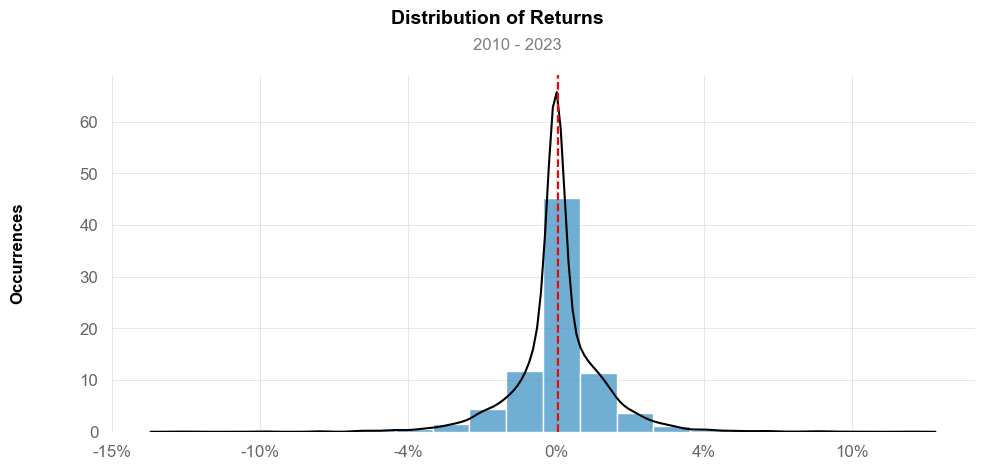


 Microsoft Daily Returns Histogram


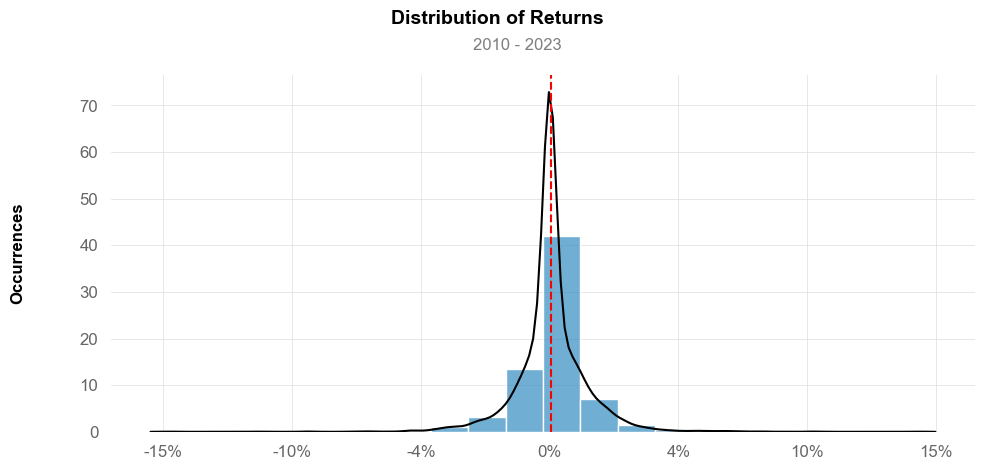


 Google Daily Returns Histogram


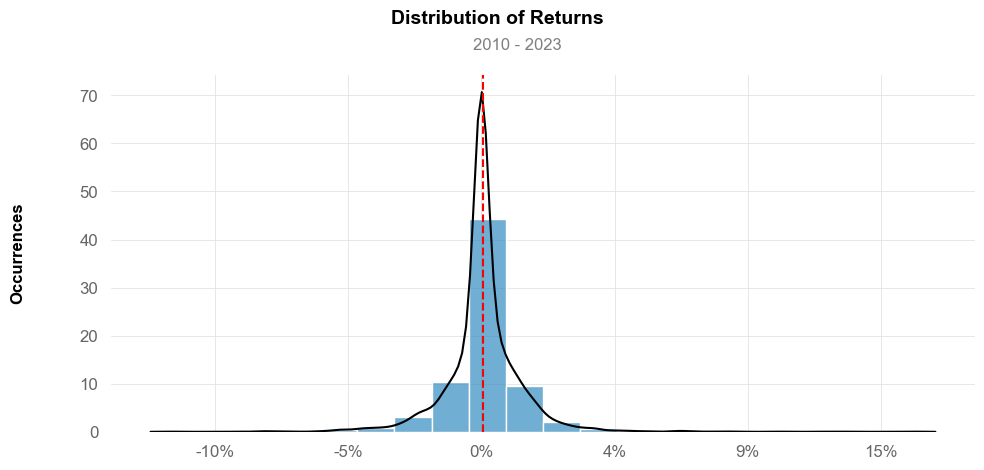


 Amazon Daily Returns Histogram


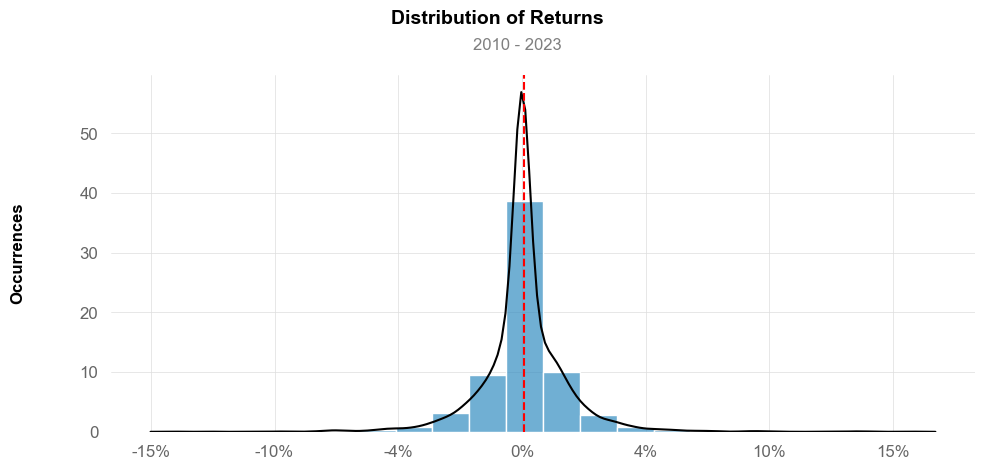

In [ ]:
# plotting the histogram for daily returns
print('\nApple Daily Returns Histogram')
qs.plots.histogram(aapl, resample = 'D')


# plotting the histogram for daily returns
print('\n Microsoft Daily Returns Histogram')
qs.plots.histogram(msft, resample = 'D')

# plotting the histogram for daily returns
print('\n Google Daily Returns Histogram')
qs.plots.histogram(googl, resample = 'D')

# plotting the histogram for daily returns
print('\n Amazon Daily Returns Histogram')
qs.plots.histogram(amzn, resample = 'D')